In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\atewa\Downloads\train (1).csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Cleaning and EDA!

In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Using for loop to fill missing values for categorical values.

In [8]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\atewa\AppData\Local\Temp\ipykernel_16556\61105506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

C:\Users\atewa\AppData\Local\Temp\ipykernel_16556\415029053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)


In [10]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Visualizations

### 1. Loan Approval Distribution.

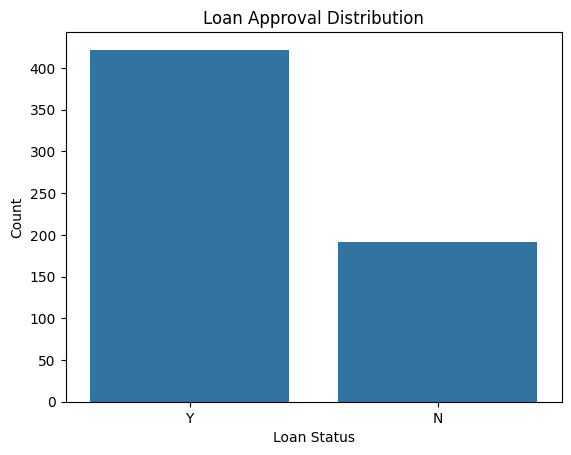

In [12]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

### 2. Credit History Impact.

### 3. Applicant Income vs Education Level

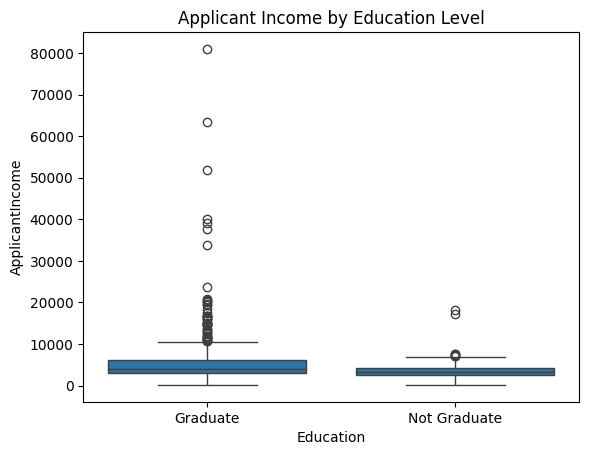

In [14]:
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Education Level')
plt.show()

### Property Area Influence

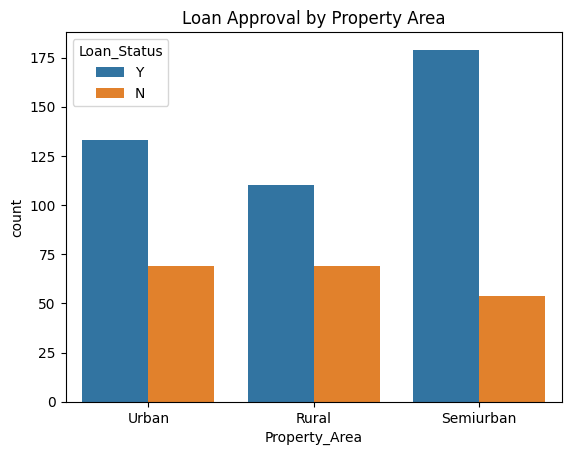

In [15]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Approval by Property Area')
plt.show()

## Feature Engineering.

### Convert Dependents to numerical.

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [17]:
df['Dependents']= df['Dependents'].replace('3+',3)
df['Dependents'] = df ['Dependents'].astype(float)

### Create [TotalIncome] and [IncomeToLoanRatio]

In [18]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['IncomeToLoanRatio'] = df['TotalIncome']/ df['LoanAmount']

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Num,TotalIncome,IncomeToLoanRatio
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,5849.0,45.695312
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,6091.0,47.585938
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,3000.0,45.454545
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,4941.0,41.175000
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,6000.0,42.553191


### Label Encoding (categorical variables)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

### Label Encoding (target variable)

In [23]:
df['Loan_Status'] = df['Loan_Status'].map({'Y' : 1, 'N':0})

In [24]:
dfm = df.drop(['Loan_ID'], axis=1)

## Model Building and Evaluation.

### Train-Test split

In [25]:
from sklearn.model_selection import train_test_split

X = dfm.drop('Loan_Status', axis=1)
y = dfm['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=42)

### Model 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
md = LogisticRegression(max_iter=1000)
md.fit(X_train,y_train)

c:\Users\atewa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
md.score(X_test,y_test)

1.0

In [ ]:
y_pred = md.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       138

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215


Confusion Matrix:
 [[ 77   0]
 [  0 138]]


### Model 2. Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier()


In [27]:
rfm.fit(X_train,y_train)
rfm.score(X_test,y_test)

ValueError: could not convert string to float: 'Female'

### Interpreting Model

In [19]:
importances = rfm.feature_importances_
features = X.columns

sns.barplot(x=importances,y=features)
plt.title('feature Importance')
plt.show()

NameError: name 'rfm' is not defined

### Model 3. Desicion Tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dm = DecisionTreeClassifier(max_depth=4, random_state=42)


In [ ]:
dm.fit(X_train,y_train)
dm.score(X_test,y_test)

1.0

### Model no.4 XGBoost Classifier.

In [ ]:
from xgboost import XGBClassifier
xgb= XGBClassifier(use_label_encoder=False,eval_metric = 'logloss')


In [ ]:
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

1.0

In [ ]:
xgb_pred = xgb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,xgb_pred))

Accuracy: 1.0


## lets Apply SMOTE(Synthetic Minority Oversampling technique)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import  Counter

In [ ]:
print("Before SMOTE: ", Counter(y))

Before SMOTE:  Counter({1: 422, 0: 192})


In [ ]:
smote = SMOTE(random_state=42)
X_rs, y_rs = smote.fit_resample(X,y)

In [ ]:
print("After SMOTE: ", Counter(y_rs))

After SMOTE:  Counter({1: 422, 0: 422})


Re-training models on resampled data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_rs, y_rs)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       138

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



In [ ]:
df.to_csv(r'C:\Users\atewa\OneDrive\Desktop\DA_Projects\Loan Approval Insights\loan_approval.csv')